In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyt
import seaborn as sns

In [ ]:
# Read the CSV data from dive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Input/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Checking Dataypes
data.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
# checking null values
#print(data.isnull().sum())
round(data.isnull().mean()*100,2)

,0
RowNumber,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


In [ ]:
# take the necessary data Columns and classify which is Target and Independent Features
X = data.iloc[:,3:-1]
Y = data.iloc[:,-1]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
# Encoding
# 1. Encoding all categorical values to numerical data
# Using One Hot Encoding, and also dropping the first value

encoded_data_x = pd.get_dummies(X,drop_first=True,dtype=int)
encoded_data_x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
# Data Split

from sklearn.model_selection import  train_test_split

x_train, x_test , y_train , y_test = train_test_split(encoded_data_x,Y, test_size=0.2 , random_state=42)

In [ ]:
x_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,596,32,3,96709.07,2,0,0,41788.37,1,0,1
4684,623,43,1,0.00,2,1,1,146379.30,0,0,1
1731,601,44,4,0.00,2,1,0,58561.31,0,1,0
4742,506,59,8,119152.10,2,1,1,170679.74,1,0,1
4521,560,27,7,124995.98,1,1,1,114669.79,0,1,0


In [ ]:
# We do Data Split before Encoding to prevent Data Leak
# Encoding
# 2. Scaling --> Normalization

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scaled_x_train = scale.fit_transform(x_train)
scaled_x_test = scale.transform(x_test)


In [ ]:
pip install keras

In [ ]:
# Building ANN Architecture

import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Forward Propagation
model = Sequential()

# input layer - no. of neurons, weighted channel - initalizer
model.add(Dense(units=11, kernel_initializer='he_uniform',input_dim=11))

# hidden layer - 1 , no.  of units = 3/4 of input layer
model.add(Dense(units=8, kernel_initializer='he_uniform', activation='relu'))

# hidden layer - 2 , no.  of units = 3/4 of input layer
model.add(Dense(units=5, kernel_initializer='he_uniform', activation='relu'))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

# Backward Propagation
model.compile(metrics=['accuracy'],optimizer='SGD',loss='binary_crossentropy')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279 (1.09 KB)

 Trainable params: 279 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the Data with the Model
# 1. Training the Data
model_history = model.fit(scaled_x_train,y_train,epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6422 - loss: 0.6678
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7872 - loss: 0.4750
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7930 - loss: 0.4659
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8029 - loss: 0.4405
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7919 - loss: 0.4503
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8071 - loss: 0.4360
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8052 - loss: 0.4435
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8117 - loss: 0.4327
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8108 - loss: 0.4288
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8203 - loss: 0.4244
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8274 - loss: 0.4070
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
#2. Predicting the Data
y_pred = model.predict(scaled_x_test)
prediction = (y_pred>0.5)
y_pred = (y_pred>0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
prediction

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
# Visualizing the Prdictions of the model

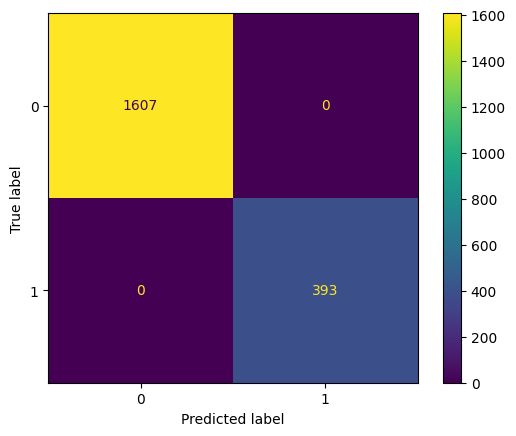

In [ ]:
# 1. Confustion Matrix - Tell the TP , TN , FP , FN
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_test)


In [ ]:
# 2. Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.45      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



In [ ]:
print("Data type of predictions:", y_pred.dtype)

Data type of predictions: bool


In [ ]:
# Testing Score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print(score)

0.8645
